In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
prices = data['Open'].values.reshape(-1, 1)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [4]:
X_train, y_train = [], []
for i in range(60, len(scaled_prices)):
    X_train.append(scaled_prices[i-60:i, 0])
    y_train.append(scaled_prices[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
model = Sequential([
    SimpleRNN(units=50, input_shape=(60, 1)),
    Dense(units=1)
])

c:\Users\Rio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0230
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4026e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5713e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9824e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1577e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2321e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1909e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4729e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9648e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1704e-04


In [8]:
predicted = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


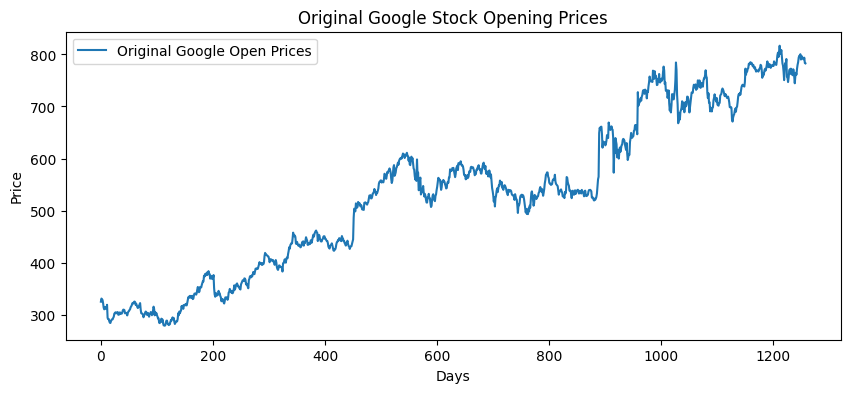

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(prices, label='Original Google Open Prices')
plt.title('Original Google Stock Opening Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

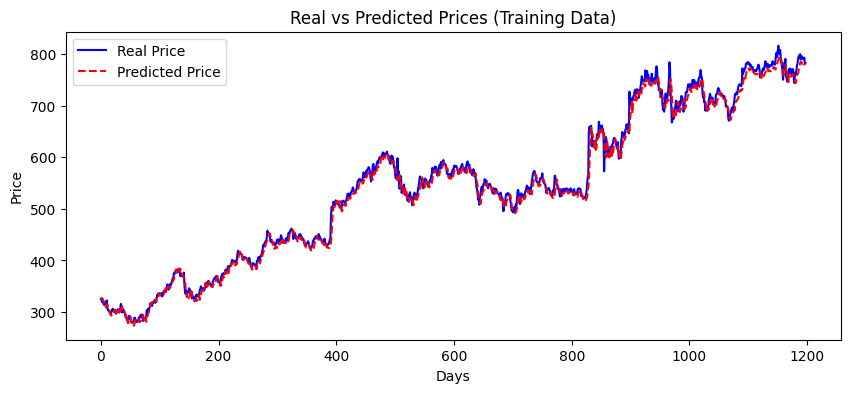

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(real_prices, color='blue', label='Real Price')
plt.plot(predicted_prices, color='red', linestyle='--', label='Predicted Price')
plt.title('Real vs Predicted Prices (Training Data)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()